In [1]:
import gc
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

gc.collect()
%matplotlib inline

In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0
    
    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))
    
    return (x, y)

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [5]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1, state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1, num_classes)), dtype=tf.float32)

In [6]:
input_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [7]:
current_state = init_state
states_series = []
for current_input in input_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1) # Increasing number of columns
    
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b) # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [8]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series]
prediction_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series, labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [9]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)
    
    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])
        
        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color='blue')
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color='red')
        plt.bar(left_offset, single_output_series * 0.3, width=1, color='green')
        
    plt.draw()
    plt.pause(0.0001)

New data, epoch 0
Step 0 Loss 0.798205
Step 100 Loss 0.697717
Step 200 Loss 0.693818
Step 300 Loss 0.688736
Step 400 Loss 0.724047
Step 500 Loss 0.693698
Step 600 Loss 0.693433
New data, epoch 1
Step 0 Loss 0.681617
Step 100 Loss 0.68936
Step 200 Loss 0.686181
Step 300 Loss 0.696666
Step 400 Loss 0.692855
Step 500 Loss 0.695171
Step 600 Loss 0.683
New data, epoch 2
Step 0 Loss 0.696045
Step 100 Loss 0.694108
Step 200 Loss 0.686866
Step 300 Loss 0.696064
Step 400 Loss 0.69354
Step 500 Loss 0.698773
Step 600 Loss 0.68884
New data, epoch 3
Step 0 Loss 0.693116
Step 100 Loss 0.691998
Step 200 Loss 0.692725
Step 300 Loss 0.692255
Step 400 Loss 0.694572
Step 500 Loss 0.691589
Step 600 Loss 0.691903
New data, epoch 4
Step 0 Loss 0.701863
Step 100 Loss 0.698111
Step 200 Loss 0.688709
Step 300 Loss 0.693419
Step 400 Loss 0.694626
Step 500 Loss 0.695617
Step 600 Loss 0.694548
New data, epoch 5
Step 0 Loss 0.68461
Step 100 Loss 0.692343
Step 200 Loss 0.685291
Step 300 Loss 0.696169
Step 400 Loss 

New data, epoch 43
Step 0 Loss 0.400699
Step 100 Loss 0.000288069
Step 200 Loss 0.000251528
Step 300 Loss 0.000278887
Step 400 Loss 0.000291458
Step 500 Loss 0.000251278
Step 600 Loss 0.000274104
New data, epoch 44
Step 0 Loss 0.405341
Step 100 Loss 0.000269546
Step 200 Loss 0.000259321
Step 300 Loss 0.000235489
Step 400 Loss 0.000238875
Step 500 Loss 0.000350036
Step 600 Loss 0.000249623
New data, epoch 45
Step 0 Loss 0.215776
Step 100 Loss 0.000261868
Step 200 Loss 0.000262139
Step 300 Loss 0.000216749
Step 400 Loss 0.000307753
Step 500 Loss 0.000206877
Step 600 Loss 0.00022096
New data, epoch 46
Step 0 Loss 0.347258
Step 100 Loss 0.000232154
Step 200 Loss 0.000246882
Step 300 Loss 0.000227643
Step 400 Loss 0.000269233
Step 500 Loss 0.000252132
Step 600 Loss 0.000229968
New data, epoch 47
Step 0 Loss 0.732982
Step 100 Loss 0.000250255
Step 200 Loss 0.000231953
Step 300 Loss 0.000248748
Step 400 Loss 0.000259568
Step 500 Loss 0.000282971
Step 600 Loss 0.000217849
New data, epoch 48
St

New data, epoch 85
Step 0 Loss 0.212352
Step 100 Loss 0.000153794
Step 200 Loss 0.000156623
Step 300 Loss 0.000122468
Step 400 Loss 0.000146131
Step 500 Loss 0.000122375
Step 600 Loss 0.000131412
New data, epoch 86
Step 0 Loss 0.208417
Step 100 Loss 0.00011835
Step 200 Loss 0.000135972
Step 300 Loss 0.000155351
Step 400 Loss 0.00016874
Step 500 Loss 0.00012758
Step 600 Loss 0.000162715
New data, epoch 87
Step 0 Loss 0.353246
Step 100 Loss 0.000137906
Step 200 Loss 0.000117598
Step 300 Loss 0.000127369
Step 400 Loss 0.000126375
Step 500 Loss 0.000127565
Step 600 Loss 0.000132226
New data, epoch 88
Step 0 Loss 0.0881407
Step 100 Loss 0.000112119
Step 200 Loss 0.000126817
Step 300 Loss 0.000145716
Step 400 Loss 0.000128044
Step 500 Loss 0.000144276
Step 600 Loss 0.00014022
New data, epoch 89
Step 0 Loss 0.218142
Step 100 Loss 0.000142053
Step 200 Loss 0.000138213
Step 300 Loss 0.000118725
Step 400 Loss 0.000123566
Step 500 Loss 0.000122825
Step 600 Loss 0.000126282
New data, epoch 90
Step

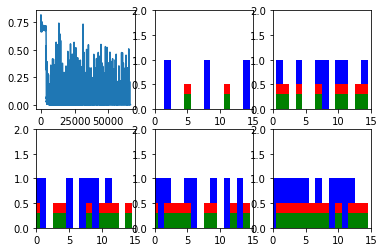

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []
    
    for epoch_idx in range(num_epochs):
        x, y = generateData()
        _current_state = np.zeros((batch_size, state_size))
        
        print('New data, epoch', epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length
            
            batchX = x[:, start_idx: end_idx]
            batchY = y[:, start_idx: end_idx]
            
            _total_loss, _train_step, _current_state, _prediction_series = sess.run(
            [total_loss, train_step, current_state, prediction_series],
            feed_dict={
                batchX_placeholder: batchX,
                batchY_placeholder: batchY,
                init_state: _current_state
            })
            
            loss_list.append(_total_loss)
            
            if batch_idx % 100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _prediction_series, batchX, batchY)
                
plt.ioff()
plt.show()